# Лабораторная работа 7
## Матрицы, СЛАУ (Wolfram)

Взять задание Sage лабы 2.3 (приведение уравнения поверхности в пространстве к каноническому виду)
	и выполнить без части по LaTeX.
	
Должно быть:
* задание системы уравнений для поиска собственных чисел в общем виде,
* получение СЛАУ не вручную, а через матричные операции умножения,
* решение этой системы,
* получение характеристического полинома через определитель,
* автоматизированное сравнение с характеричтическим полиномом по встроенным функциям Wolfram,
* решение характеристического полинома и получение таким образом собственных чисел,
* автоматизированная проверка собственных чисел с встроенными в Wolfram функциями по получению собственных чисел,
* аналогично для собственных векторов.
* График для исходного уравнения,
* график для уравнения в каноническом виде.


Вариант 1.  
$f = 7x^2 + 8xy + 3y^2 + 8xz + 6yz + 3z^2 + 6x + y + 7$

*Алгоритм и все формулы взяты отсюда: http://mathhelpplanet.com/static.php?p=privedenie-uravneniya-poverhnosti-k-kanonicheskomu-vidu*

In [1]:
f := 7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7;
f // TraditionalForm

FormBox[RowBox[{RowBox[{"7", " ", SuperscriptBox["x", "2"]}], "+", 

 
>        RowBox[{"8", " ", "x", " ", "y"}], "+", RowBox[{"8", " ", "x", " ", "z"}], "+",\
 
>    
     RowBox[{"6", " ", "x"}], "+", RowBox[{"3", " ", SuperscriptBox["y", "2"]}],\
 
>    "+", 
     RowBox[{"6", " ", "y", " ", "z"}], "+", "y", "+", 

 
>        RowBox[{"3", " ", SuperscriptBox["z", "2"]}], "+", "7"}], TraditionalForm]

Построим поверхность по исходному уравнению.

In [3]:
initial[a_, b_, c_] := f /. {x->a, y->b, z->c}

-Graphics3D-
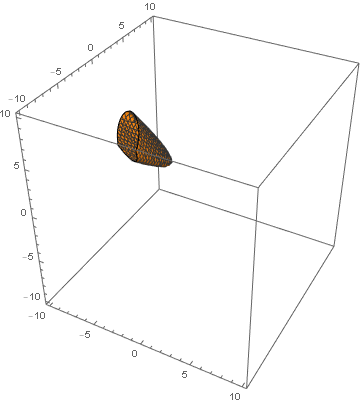

In [4]:
ContourPlot3D[initial[x, y, z] == 0, {x, -10, 10}, {y, -10, 10}, {z, -10, 10}]

Составим матрицу квадратичной формы

7   4   4

4   3   3

4   3   3
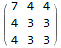

In [5]:
A = {
        {7, 4, 4},
        {4, 3, 3},
        {4, 3, 3}
    };

A // MatrixForm

Составим характеристический многочлен.

In [7]:
myCharPoly = Det[A - IdentityMatrix[3] * l];
myCharPoly // TraditionalForm

FormBox[RowBox[{RowBox[{"-", RowBox[{SuperscriptBox["l", "3"]}]}], "+", 

 
>        RowBox[{"13", " ", SuperscriptBox["l", "2"]}], "-", RowBox[{"10", " ", "l"}]}],\
 
>    
   TraditionalForm]

Сравним полученный характеристический многочлен с многочленом, построенным при помощи стандартной функции Wolfram.

In [9]:
autoCharPoly = CharacteristicPolynomial[A, l]

2    3
-10 l + 13 l  - l

In [10]:
SameQ[myCharPoly, autoCharPoly]

True

Резлультаты совпали, значит характеристический многочлен найден верно.

Найдем теперь собственные числа.

13 - Sqrt[129]         13 + Sqrt[129]
{{l -> 0}, {l -> --------------}, {l -> --------------}}
                       2                      2
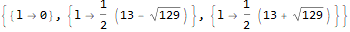

In [11]:
sols = Solve[myCharPoly == 0, l]

13 - Sqrt[129]  13 + Sqrt[129]
{0, --------------, --------------}
          2               2
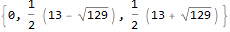

In [12]:
myEigenValues = l /. sols

Сравним найденные собственные числа с собственными числами, полученными встроенной функцией Wolfram.

13 + Sqrt[129]  13 - Sqrt[129]
{--------------, --------------, 0}
       2               2
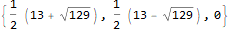

In [13]:
autoEigenValues = Eigenvalues[A]

Чтобы сравнить два списка, нужно отсортировать числа в них.

In [14]:
myEigenValues = Sort[myEigenValues];
autoEigenValues = Sort[autoEigenValues];

In [16]:
SameQ[myEigenValues, autoEigenValues]

True

Резлультаты совпали, значит собственные числа найдены верно.

Теперь ищем собственные векторы.

In [17]:
X = {x, y, z}; (* вектор неизвестных *)

Составим СЛАУ для нахождения первого собственного вектора.

In [18]:
A1 = A - IdentityMatrix[3] * l /. l -> myEigenValues[[1]];
A1X = A1.X;

Стандартная функция Eigensystem находит СВ, у которых переменная z равна единице. Будем искать СВ вручную с тем же условием.

In [20]:
myEigenVector1 = Solve[A1X == 0 /. z->1];
myEigenVector1 = {x, y, 1} /. myEigenVector1[[1]]

{0, -1, 1}

Получили первый собственный вектор. Аналогично найдём остальные два.

4 (-13 + Sqrt[129])
{-------------------, 1, 1}
  -29 + 3 Sqrt[129]
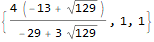

In [22]:
A2 = A - IdentityMatrix[3] * l /. l -> myEigenValues[[2]];
A2X = A2.X;

myEigenVector2 = Solve[A2X == 0 /. z->1];
myEigenVector2 = {x, y, 1} /. myEigenVector2[[1]]

4 (13 + Sqrt[129])
{------------------, 1, 1}
  29 + 3 Sqrt[129]
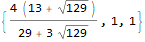

In [26]:
A3 = A - IdentityMatrix[3] * l /. l -> myEigenValues[[3]];
A3X = A3.X;

myEigenVector3 = Solve[A3X == 0 /. z->1];
myEigenVector3 = {x, y, 1} /. myEigenVector3[[1]]

Найдем собственные векторы с помощью функции Eigensystem. Сравним ее результат с СВ, вычисленными вручную.

13 + Sqrt[129]  13 - Sqrt[129]
{{--------------, --------------, 0}, 
        2               2
 
      1 + Sqrt[129]          1 - Sqrt[129]
>   {{-------------, 1, 1}, {-------------, 1, 1}, {0, -1, 1}}}
            8                      8
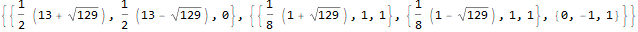

In [30]:
autoEigenSystem = Eigensystem[A]

Отсортировать такую штуку нелегко, поэтому будем подбирать индексы для сравнения вручную. Последние два СВ будем сравнивать в численном виде.

In [31]:
SameQ[autoEigenSystem[[2, 3]], myEigenVector1]
SameQ[N[autoEigenSystem[[2, 2]]], N[myEigenVector2]]
SameQ[N[autoEigenSystem[[2, 1]]], N[myEigenVector3]]

True
True
True

Результаты совпали, все собственные векторы найдены верно.

Составим матрицу из собственных векторов. Предварительно векторы нужно нормализовать. Это можно сделать при помощи встроенной функции.

0.          -0.675261   0.737579

-0.707107   0.521547    0.477482

0.707107    0.521547    0.477482
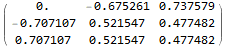

In [34]:
S = Transpose[{
    Normalize[myEigenVector1], 
    Normalize[myEigenVector2],
    Normalize[myEigenVector3]
}];

N[S] // MatrixForm

Теперь нам необходимо создать вектор-столбец коэффициентов линейной формы,

3

0.5

0
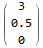

In [36]:
a = {3, 0.5, 0};

a // MatrixForm

вектор $S^T*a$

-0.353553

-1.76501

2.45148
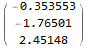

In [38]:
a1 = Transpose[S].a;

N[a1] // MatrixForm

и выделим свободный член уравнения.

In [40]:
a0 = 7;

Начнем составлять канонический вид уравнения.

2                                   2
                               (13 - Sqrt[129]) y1                 (13 + Sqrt[129]) z1
7 - 0.707107 x1 - 3.53002 y1 + -------------------- + 4.90295 z1 + --------------------
                                        2                                   2
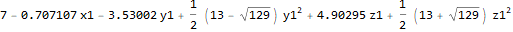

In [86]:
fCanonical = myEigenValues[[1]] * x1^2 + myEigenValues[[2]] * y1^2 + myEigenValues[[3]] * z1^2 + 2 * a1[[1]] * x1 + 2 * a1[[2]] * y1 + 2 * a1[[3]] * z1 + a0

In [87]:
ExpandAll[FullSimplify[fCanonical]]

2                          2
7. - 0.707107 x1 - 3.53002 y1 + 0.821092 y1  + 4.90295 z1 + 12.1789 z1

В уравнении есть ненулевые коэффициенты при $x_1, y_1, z_1$, от которых нужно избавиться. Так как для $y_1$ и $z_1$ в уравнении есть ненулевые коэффициенты при квадратах этих переменных, то мы можем дополнить эти члены до полного квадрата и сделать замену.

Чтобы выполнить сложную замену, нужно явно выделить заменяемую часть в формуле. Для этого прежде выполним тождественные замены.

2                      2
                       (13 - Sqrt[129]) y1    (13 + Sqrt[129]) z1
2.7125 - 0.707107 x1 + -------------------- + --------------------
                                2                      2
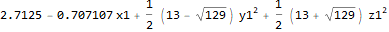

In [88]:
(* Тождественные замены. Они ничего не меняют и нужны только для того, 
    чтобы явно выделить те куски формулы, которые мы будем заменять далее *)
fCanonical = fCanonical /. (myEigenValues[[2]] * y1^2 + 2 * a1[[2]] * y1) -> (myEigenValues[[2]] * (y1 + a1[[2]] / myEigenValues[[2]])^2 - myEigenValues[[2]] * (a1[[2]] / myEigenValues[[2]])^2);
fCanonical = fCanonical /. (myEigenValues[[3]] * z1^2 + 2 * a1[[3]] * z1) -> (myEigenValues[[3]] * (z1 + a1[[3]] / myEigenValues[[3]])^2 - myEigenValues[[3]] * (a1[[3]] / myEigenValues[[3]])^2);

(* Вот тут уже непосредственно производится замена *)
fCanonical = fCanonical /. (y1 + a1[[2]] / myEigenValues[[2]]) -> y1;
fCanonical = fCanonical /. (z1 + a1[[3]] / myEigenValues[[3]]) -> z1;
fCanonical

In [95]:
ExpandAll[FullSimplify[fCanonical]]

2             2
2.7125 - 0.707107 x1 + 0.821092 y1  + 12.1789 z1

Осталось разобраться с коэффициентом при $x_1$. Сделаем такую замену переменной, при которой свободный член станет равен нулю.

Сначала нужно найти этот самый свободный член. Это можно сделать, занулив все переменные.

In [96]:
newa0 = fCanonical /. {x1->0, y1->0, z1->0}

2.7125

Теперь выполняем саму замену. Как и в прошлый раз, сначала выполним тождественное преобразование.

2                      2
               (13 - Sqrt[129]) y1    (13 + Sqrt[129]) z1
-0.707107 x1 + -------------------- + --------------------
                        2                      2
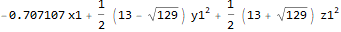

In [97]:
(* Тождественная замена *)
fCanonical = fCanonical /. (2 * a1[[1]] * x1 + newa0) -> (2 * a1[[1]] * (x1 + newa0 / (2 * a1[[1]])));

(* Непосредственно замена *)
fCanonical = fCanonical /. (x1 + newa0 / (2 * a1[[1]])) -> x1;
fCanonical

In [102]:
fCanonical = ExpandAll[FullSimplify[fCanonical]]

2             2
-0.707107 x1 + 0.821092 y1  + 12.1789 z1

Чтобы поверхность действительна была приведена к каноническому виду, необходимо переименовать координатные оси (т.к. линейный член может быть только по оси Z).

In [103]:
fCanonical = fCanonical /. {x1->z1, z1->x1};
fCanonical = fCanonical /. {x1->y1, y1->x1}

2             2
0.821092 x1  + 12.1789 y1  - 0.707107 z1

Построим поверхность в каноническом виде.

In [105]:
canonical[a_, b_, c_] := fCanonical /. {x1->a, y1->b, z1->c}

-Graphics3D-
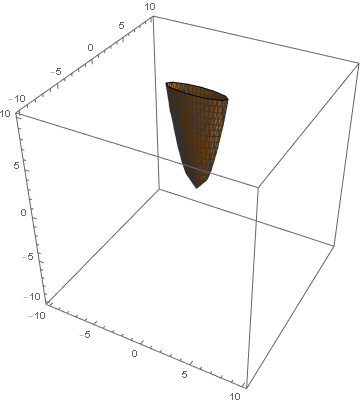

In [106]:
ContourPlot3D[canonical[x, y, z] == 0, {x, -10, 10}, {y, -10, 10}, {z, -10, 10}]

Полученный канонический вид совпал с тем, что получилось во 2-ой ЛР.